In [41]:
""" TRUE """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import exp
from math import sin
from math import cos
from math import sqrt
from math import pi

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [29]:
g = 0.43
mu = 927.4e-26
h_bar = 1.054e-34
gamma = 1

In [32]:
B = 2e-3
b = 0.5e-3
T1 = 250e-9
T2 = 250e-9
f = 20e+6

In [30]:
def spin(B, b, T1, T2, f):

    T = 1/f
    omega1 = g*mu*B/h_bar
    omega2 = g*mu*sqrt(b**2 + B**2)/h_bar
    s_st = gamma*B
    
    e1 = exp(-T/T1)
    e2 = exp(-T/T2)
    c1, c2 = cos(omega1*T/2), cos(omega2*T/2)
    s1, s2 = sin(omega1*T/2), sin(omega2*T/2)
    c, s = B/sqrt(B**2+b**2), b/sqrt(B**2+b**2)

    A = np.array([[(c2*c*c1-s2*s1)*e2**2 - c,
                   (-c2*c*s1-s2*c1)*e2**2, 
                   (-c2*s)*e2*e1 + s],

                  [(s2*c*c1+c2*s1)*e2**2,
                   (-s2*c*s1+c2*c1)*e2**2 - 1,
                   (-s2*s)*e1*e2],

                  [s*c1*e1*e2 - s,
                   -s*s1*e2*e1,
                   c*e1**2 - c]])
    
    B = np.array([[(c*c2*e2) + 1,
                   -s2*e2, 
                   s*c2*e2],

                  [(c*s2*e2),
                   c1*e2 + 1,
                   (-s*s2)*e2],

                  [s*e1,
                   0,
                   c*e1 + 1]])
    
    ss = np.array([s*c2*e2*s_st*(1-e1), s*s2*e2*s_st*(1-e1), (-c*e1-1)*s_st*(1-e1)])
    #ss = np.array([0, 0, s_st*(1-e1)])
    
    
    s = np.linalg.solve(A, ss)
    
    #*div_delta_s = *div(s2-s0) in terms of [div(delta_s[x]), div(delta_s[x]), div(delta_s[x])]
    dds = A@[1., 1., 1.]
    ddds = sqrt(dds@dds)
    
    return s

In [5]:
spin(B, b, T1, T2, f)

array([ 0.00030472, -0.00034381,  0.00189882])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]


<IPython.core.display.Javascript object>


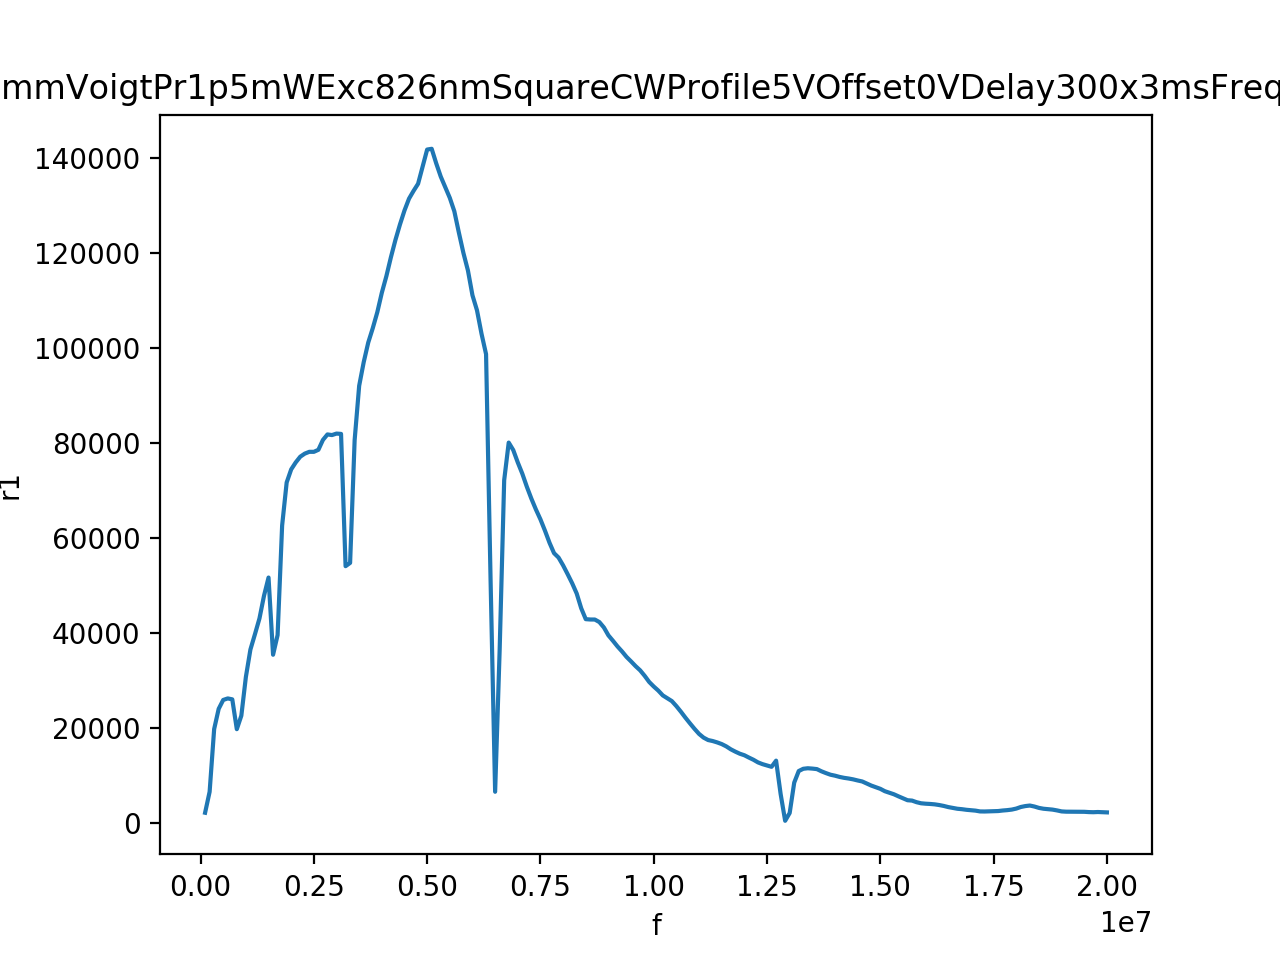

Text(0.5, 1.0, "['GaAsT6KBm150mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz', 'GaAsT6KBm140mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz', 'GaAsT6KBm130mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz', 'GaAsT6KBm120mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz', 'GaAsT6KBm110mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz']")

In [113]:
'''import data'''

folder = '/Users/alexandrakorotneva/лаба/2019.07.04-GaAs/'
#name = 'GaAsT6KBm130mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz'
name = ['GaAsT6KBm150mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm140mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm130mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm120mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm110mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz']

D = []
for i in range(5):
    table = pd.read_csv(folder+name[i]+'.dat', sep='  ', names=['f', 'x', 'y'])
    tall = len(table['f'])
    table = table.assign(r1=pd.Series(-1*np.ones(tall)).values)
    f = lambda x: x**2
    table.r1 = table['x'].apply(f) + table['y'].apply(f)
    
    D.append(table.r1)

F = table.f*1000

plt.figure()
plt.plot(F, D[0])
plt.xlabel('f')
plt.ylabel('r1')
plt.title(name)


<IPython.core.display.Javascript object>


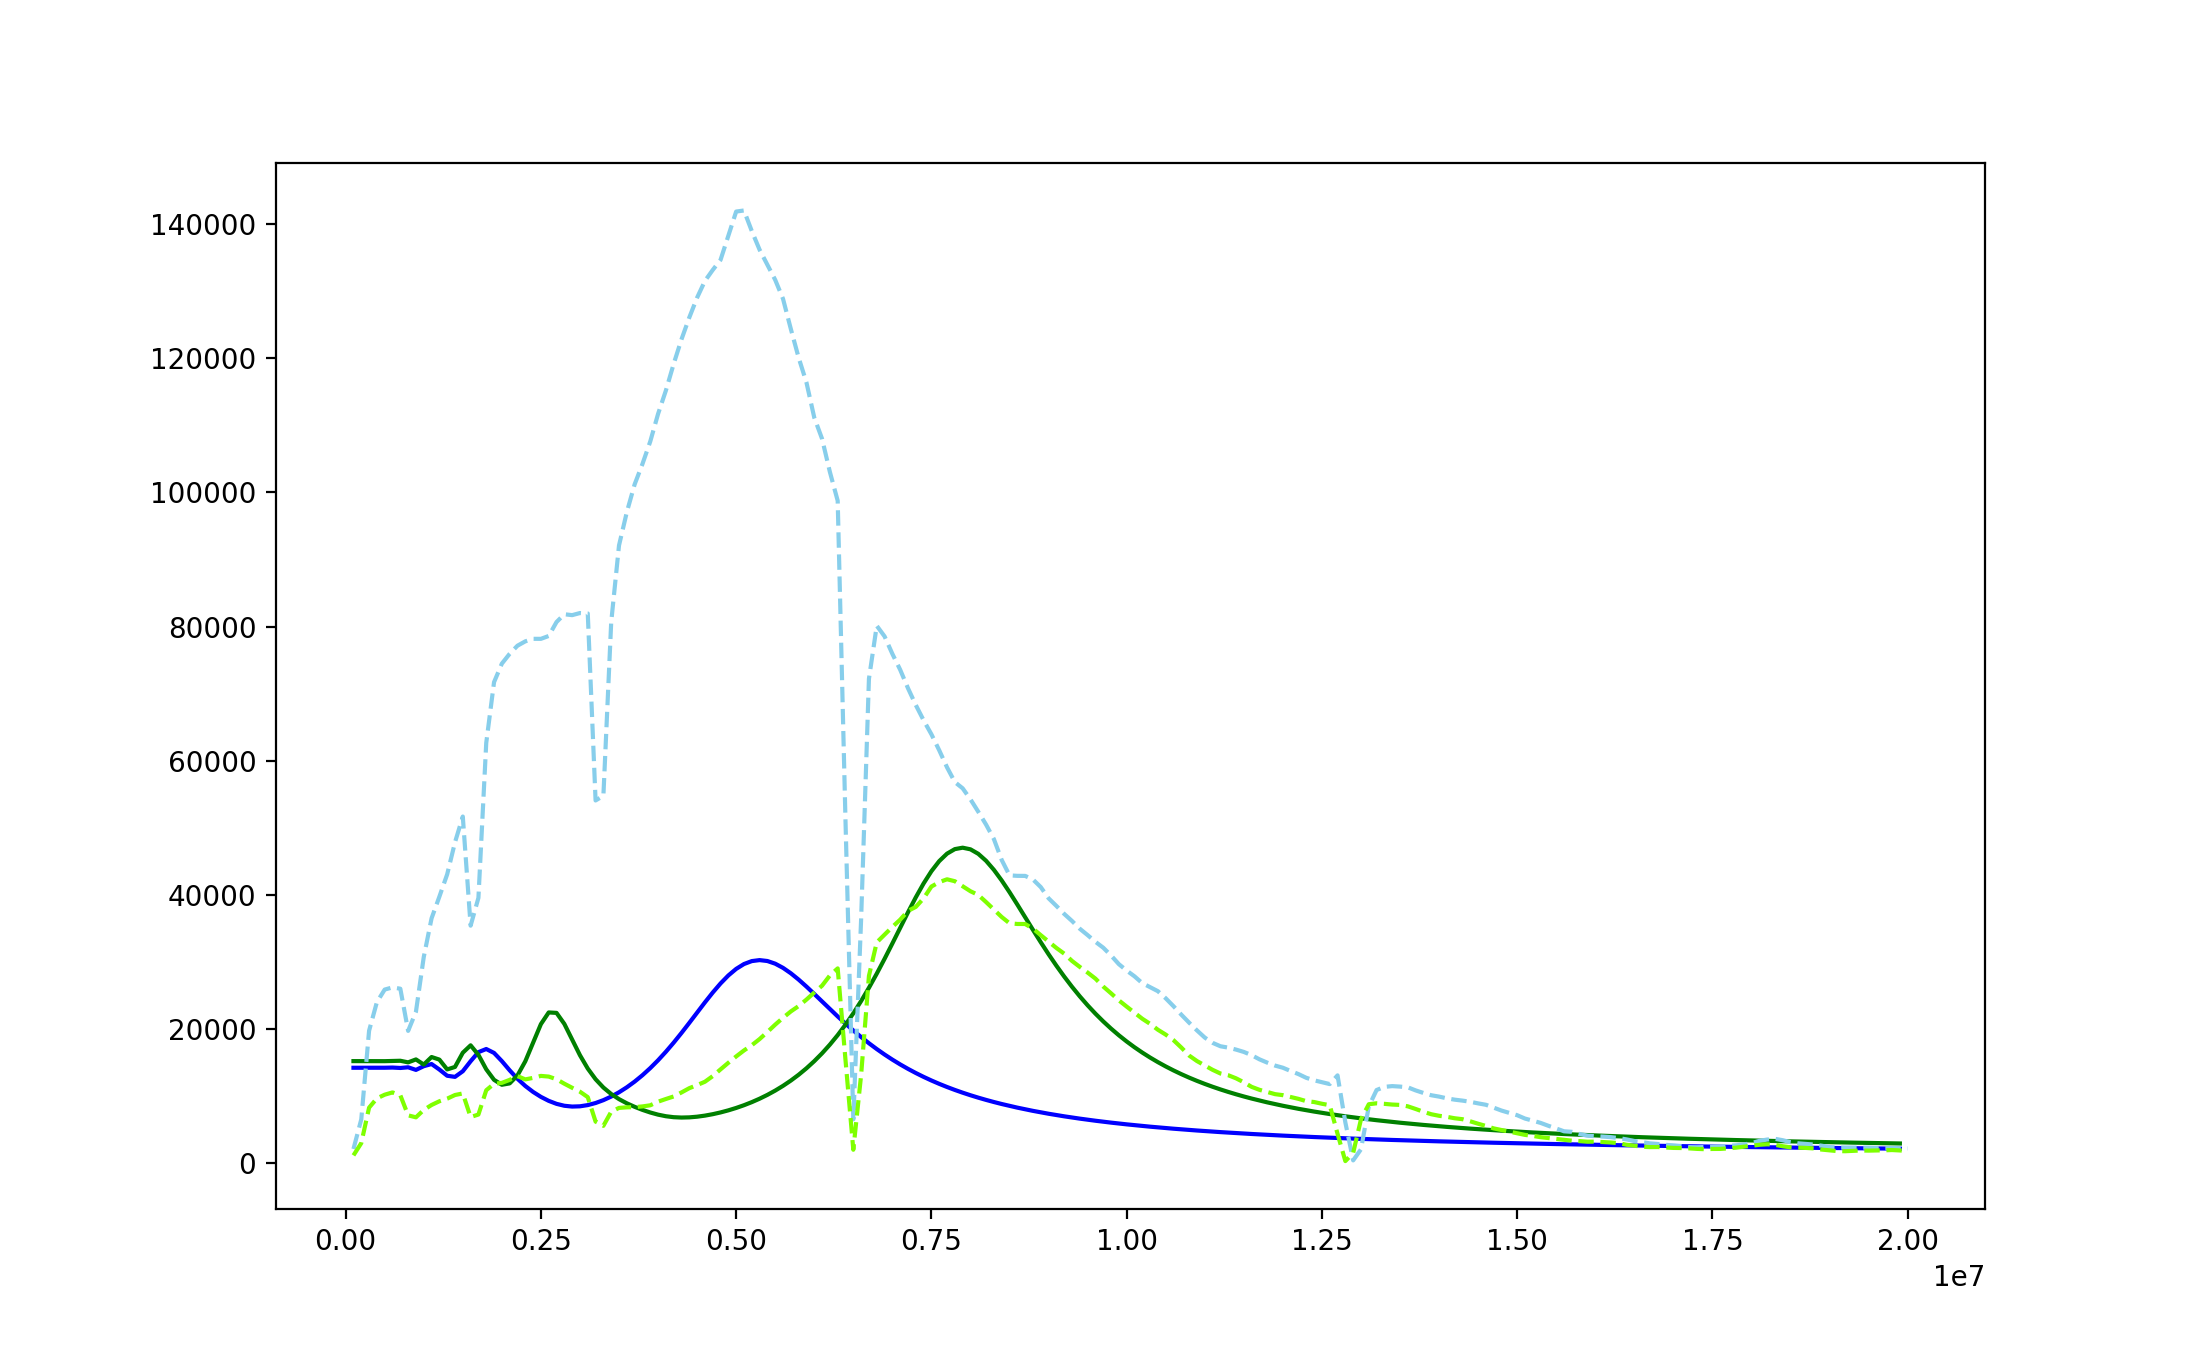

'plt.figure()\nplt.plot(mf, msfx)\nplt.figure()\nplt.plot(mf, msfy)\nplt.figure()\nplt.plot(mf, msfz)'

In [167]:
%matplotlib notebook

mf = np.arange(0.1e6, 20e6, 1e5)

msfx = [spin(B, b, T1, T2, x)[0] for x in mf]
msfy = [spin(B, b, T1, T2, x)[1] for x in mf]
msfz = [spin(B, b, T1, T2, x)[2] for x in mf]

B1 = 0.831e-3
B2 = 0.997e-3
B3 = 1.279e-3
B4 = 1.645e-3
B5 = 2.194e-3

b = 0.3e-3

msf1 = [sqrt(spin(B1, b, T1, T2, x)[0]**2)*10e7-14000 for x in mf]
msf2 = [sqrt(spin(B2, b, T1, T2, x)[0]**2)*10e7-14000 for x in mf]
msf3 = [sqrt(spin(B3, b, T1, T2, x)[0]**2)*10e7-14000 for x in mf]
msf4 = [sqrt(spin(B4, b, T1, T2, x)[0]**2)*10e7-14000 for x in mf]
msf5 = [sqrt(spin(B5, b, T1, T2, x)[0]**2)*10e7-14000 for x in mf]
#msf5 = [sqrt(spin(B5, b, T1, T2, x)[0]**2 + spin(B5, b, T1, T2, x)[1]**2) for x in mf]

plt.figure()
#\plt.yscale('log')

plt.plot(mf, msf1, color='b')
#plt.plot(mf, msf2, color='r')
plt.plot(mf, msf3, color='g')
#plt.plot(mf, msf4, color='y')
#plt.plot(mf, msf5, color='purple')

plt.plot(F, D[0], color='skyblue', linestyle='--')
#plt.plot(F, D[1], color='tomato', linestyle='--')
plt.plot(F, D[2], color='chartreuse', linestyle='--')
#plt.plot(F, D[3], color='gold', linestyle='--')
#plt.plot(F, D[4]*6e-8+0.00048, color='orchid', linestyle='--')

"""plt.figure()
plt.plot(mf, msfx)
plt.figure()
plt.plot(mf, msfy)
plt.figure()
plt.plot(mf, msfz)"""


In [ ]:
'''bin'''

<IPython.core.display.Javascript object>


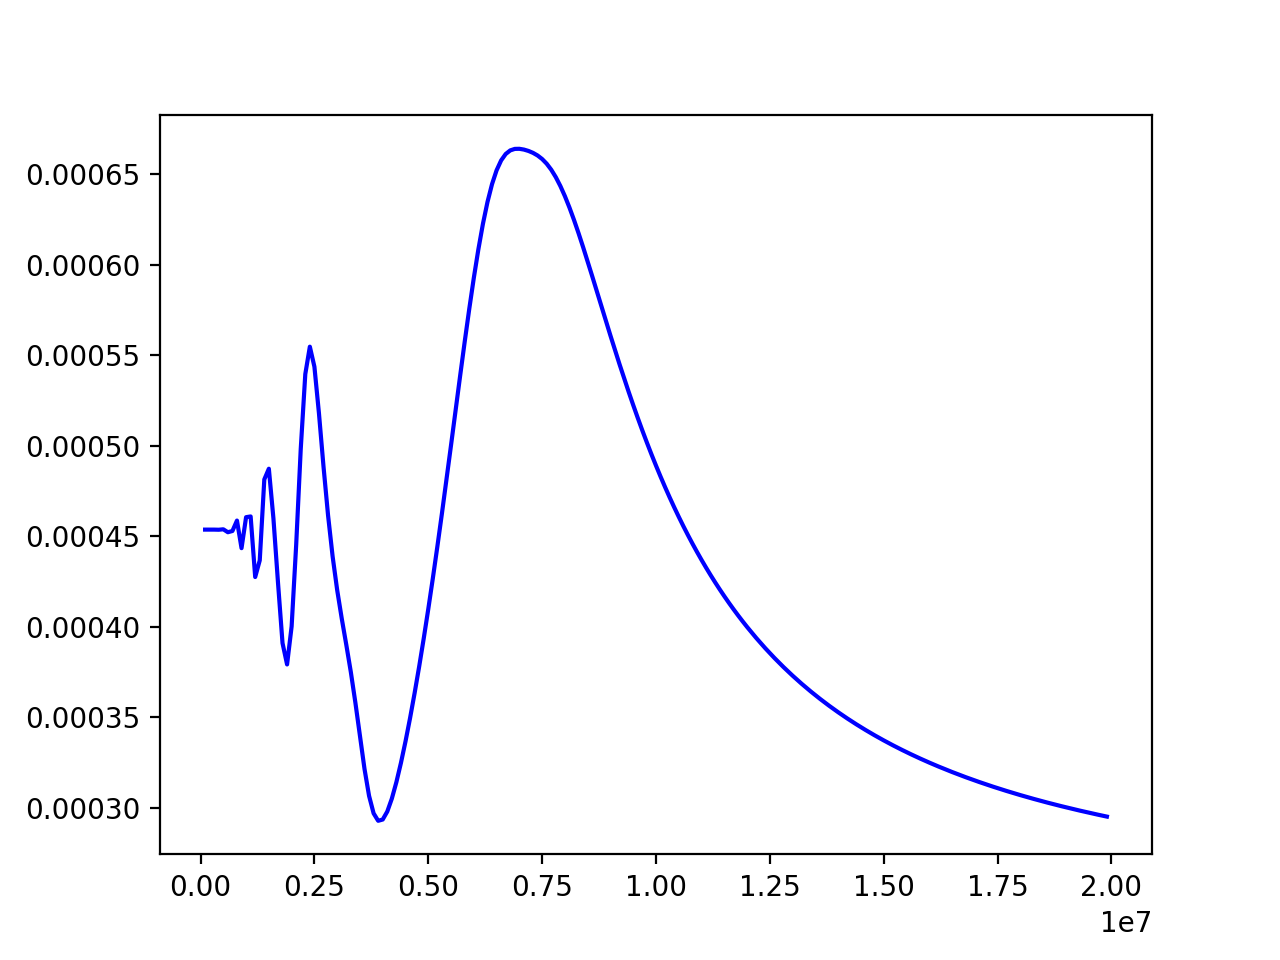

In [20]:
ppi = 3.1415
def lor(x, x0=7500e3, y0=4e-4, A=1, w=1000):
    return y0 + 2*A/ppi * w/(4*(x-x0)**2 + w**2)

%matplotlib notebook

B1 = 1.078e-3

mf = np.arange(0.1e6, 20e6, 1e5)
#lor = [lor(x) for x in mf]
msf1 = [sqrt(spin(B1, b, T1, T2, x)[0]**2 + spin(B1, b, T1, T2, x)[1]**2) for x in mf]
plt.figure()
plt.plot(mf, msf1, color='b')
#plt.plot(mf, lor, color='r', linestyle='--')

In [ ]:
%matplotlib notebook

mB = np.arange(1e-4, 5e-2, 1e-5)
msBx = [spin(x, b, T1, T2, f)[0] for x in mB]
msBy = [spin(x, b, T1, T2, f)[1] for x in mB]
msBz = [spin(x, b, T1, T2, f)[2] for x in mB]
msB = [sqrt(spin(x, b, T1, T2, f)[0]**2 + spin(x, b, T1, T2, x)[1]**2) for x in mB]
msB2 = [sqrt(spin(x, 2e-3, T1, T2, f)[0]**2 + spin(x, 2e-3, T1, T2, x)[1]**2) for x in mB]

plt.plot(mB, msB)
#plt.plot(mB, msB2)

In [ ]:
def spin_num(B, b, T1, T2, f):

    T = 1/f
    omega1 = g*mu*B/h_bar
    omega2 = g*mu*sqrt(b**2 + B**2)/h_bar
    s_st = gamma*B
    
    e1 = exp(-T/2*T1)
    e2 = exp(-T/2*T2)
    c1, c2 = cos(omega1*T/2), cos(omega2*T/2)
    s1, s2 = sin(omega1*T/2), sin(omega2*T/2)
    c, s = B/sqrt(B**2+b**2), b/sqrt(B**2+b**2)

    A1 = np.array([[c1*e2, -s1*e2, 0],
                  [s1*e2, c1*e2, 0],
                  [0, 0, e1]])
    
    A2 = np.array([[c2*e2, -s2*e2, 0],
                  [s2*e2, c2*e2, 0],
                  [0, 0, e1]])
    
    A_ = np.array([[c, 0, -s],
                  [0, 1, 0],
                  [s, 0, c]])
    
    E = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

    ss = np.array([0, 0, s_st*(1-e1)])
    AA =A_@A1
    AA = A2@AA - A_
    BB = -(A2@A_ + E)
    
    s = np.linalg.solve(AA, BB@ss)

    return s